## ECE495 In-class Exercise 5: Egg Hunt

In this exercise, you will:
- Find 10 eggs
- Work together as a group to piece together the snippets of code provided in the eggs AND determine which neuron to probe and plot to get the correct output
- _Note: one egg contains a snippet of code that is NOT NEEDED!_

The main concepts reviewed in this egg hunt are:
- Neuron transformations to implement an easy function
- Neuron dynamics to implement an integrator
- Inhibition by means of a "control" node (much easier than path planning!) that turns off outputs at given times ([example code here](https://www.nengo.ai/nengo/examples/advanced/inhibitory-gating.html))
- Appropriate instances in which to code within the Nengo model

Why??
- To remind ourselves of how neurons work after a weeklong break
- To have a little fun before we dive back into the hard stuff

#### Set up

**Ensure you are using your [495 Virtual Environment](https://github.com/kaitlin-fair/495venv_setup) before you begin!**  
  
If you are using your virtual environment, when you run this section you should see that you are using TensorFlow version 2.10.1.
  
Import TensorFlow and other libraries into your program to get started:

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.processes import Piecewise

#### Put the code in the correct order

Remember, one egg isn't needed!

In [5]:
model = nengo.Network(label="Egghunt")


def abs_val(x):
    return np.abs(x)


n_neurons = 30
tau = 0.1
with model:

    # just the inputs, need these!
    inp = nengo.Node(lambda t: np.cos(3 * t))
    inhib = nengo.Node(Piecewise({0: 0, 2.5: 1, 5: 0, 7.5: 1, 10: 0, 12.5: 1}))

    # make ensembles that the integrator and function will need, number of neurons=30, all 1 dimension
    integrator_neuron = nengo.Ensemble(n_neurons, dimensions=1)
    function_neuron = nengo.Ensemble(n_neurons, dimensions=1)

    # connects the integrator neuron to itself, with just a transform of 1, the inhibition is connected to the ensemble neurons by multiplying by -2.5 and n_neurons
    # the inhibition is connected to the neurons of the integrator
    nengo.Connection(integrator_neuron, integrator_neuron, transform=[[1]], synapse=tau)
    nengo.Connection(inhib, integrator_neuron.neurons, transform=[[-2.5]] * n_neurons)

    # the result would have been in integrator_neuron, not where want end!
    # did abs val before tau, would make less precise
    # wrong one!!!
    nengo.Connection(inp, function_neuron, function=abs_val)
    nengo.Connection(function_neuron, integrator_neuron, transform=[[tau]], synapse=tau)

    # #connects input to integrator with a transform of tau, integrator
    # right one!!
    # nengo.Connection(inp, integrator_neuron, transform=[[tau]])
    # nengo.Connection(integrator_neuron, function_neuron, function=abs_val)

    sin_probe = nengo.Probe(inp)
    inhib_probe = nengo.Probe(inhib)
    integrator_probe = nengo.Probe(integrator_neuron, synapse=0.01)
    function_probe = nengo.Probe(function_neuron, synapse=0.01)

    with nengo.Simulator(model) as sim:
        sim.run(15)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

#### Plot the outputs!

Be sure to plot the correct probe to get the right output.

Make sure your plot matches that of your instructors!

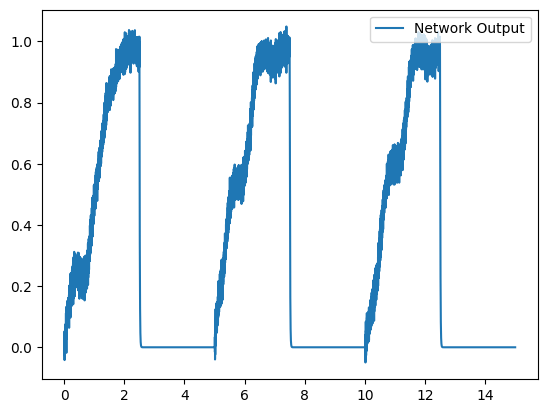

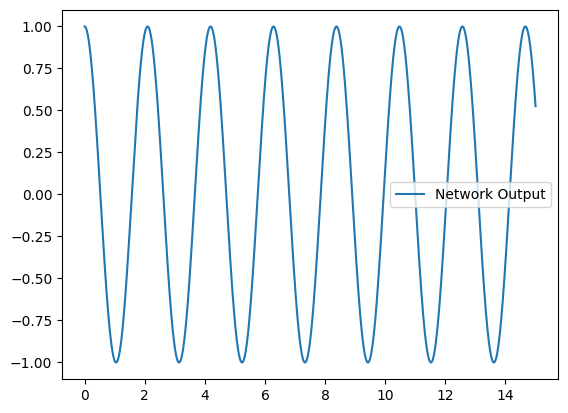

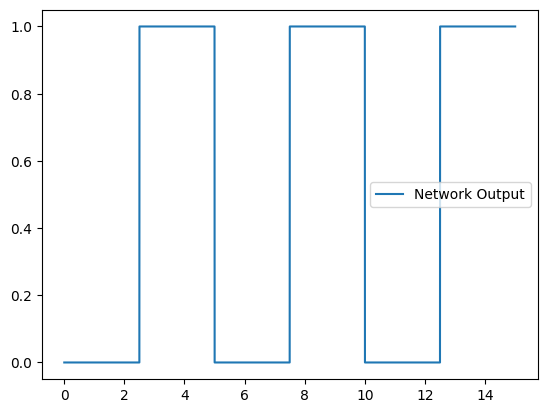

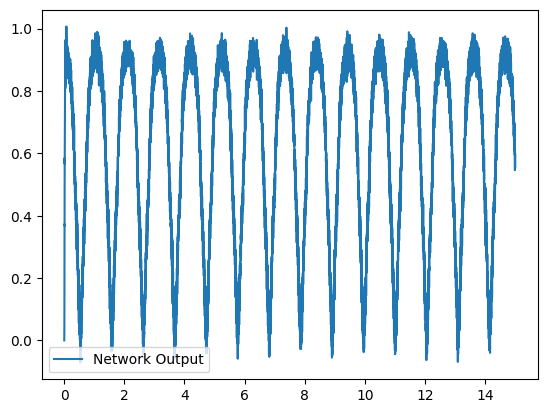

In [6]:
plt.figure()
plt.plot(sim.trange(), sim.data[integrator_probe], label="Network Output")
plt.legend()

plt.figure()
plt.plot(sim.trange(), sim.data[sin_probe], label="Network Output")
plt.legend()

plt.figure()
plt.plot(sim.trange(), sim.data[inhib_probe], label="Network Output")
plt.legend()

plt.figure()
plt.plot(sim.trange(), sim.data[function_probe], label="Network Output")
plt.legend()

### Explain why you got rid of the piece of code you chose to eliminate
Be sure to explain this in terms of _why_ it would have changed your results. Make your response concise but technical!



One hint that told me the code snippet was wrong was that the absolute value function was used before the inhibitory neuron, which kind of defeats the purpose of an inhibitory signal. Another hint that told me that code was wrong was that it used the integrator after the absolute value when an integrator would have possibly canceled out some values to make it smaller, while the wrong piece had double the integration values. Finally, the correct code is gated with the input code while the incorrect code is gated with the output of another signal, which, if we want to have inhibition, we want to rely on the input and the inhibition. Since the incorrect code relied on another ensemble, it brought in some error, and if we want a precise output, then we should just use the inital input. 